![Sprocket Central](https://cdn-assets.theforage.com/icons/kpmg_icons/sprocket_central_logo.png)

## SPROCKET CENTRAL
Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.


## Data Cleaning, Exploratory Data Analysis and Data Visualization.

##### This is a 2017 dataset. The main goal of this project is to recommend which of these **1000** new customers should be targeted to drive the most value for the organisation. 

In this project we will;
- Conduct data quality assessment, data cleaning, and data transformation as needed.
- Explore the relationships between the different datasets to identify any patterns and insights that may be relevant to the analysis.
- Perform descriptive statistics to gain an understanding of the data distributions.
- Visualize the data using graphs, charts, and other visual aids to identify any trends or patterns.
- Perform feature engineering, such as creating new variables, combining variables, or transforming variables, to create more meaningful features.

### Loading libraries, reading excel(xlsx) files in to dataframes and viewing the data.

#### We will import the required libraries/packages and turn off warnings.

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

First, we would read the Sprocket Central dataset into a Pandas dataframe and print its summary. There are three(3) datasets - Customer Demographic, Customer Address and Transactions - for targeted customer analysis. Using pandas read_csv function to load the datasets into separate dataframes.

In [28]:
Customer_Demo = pd.read_excel('C:/Users/HP/Downloads/Customer Demographics.xlsx')
Customer_Demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [29]:
Address = pd.read_excel('C:/Users/HP/Downloads/Customer Address.xlsx')
Address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [30]:
Transactions = pd.read_excel('C:/Users/HP/Downloads/Transactions.xlsx')
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


## Lets do some Data Cleaning!

In [31]:
# dropping duplicates
Customer_Demo.drop_duplicates(inplace = True)
Address.drop_duplicates(inplace = True)
Transactions.drop_duplicates(inplace = True)
print("Duplicates have been dropped")

Duplicates have been dropped


In [32]:
Customer_Demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [33]:
# dropping unwanted columns
Customer_Demo = Customer_Demo.drop('default', axis = 1)

In [34]:
# data replacement
# replacing gender with right values for consistency
Customer_Demo['gender'] = Customer_Demo['gender'].replace('F', 'Female')
Customer_Demo['gender'] = Customer_Demo['gender'].replace('f', 'Female')
Customer_Demo['gender'] = Customer_Demo['gender'].replace('M', 'Male')
Customer_Demo['gender'] = Customer_Demo['gender'].replace('m', 'Male')
Customer_Demo['gender'] = Customer_Demo['gender'].replace('Femal', 'Female')
Customer_Demo['gender'] = Customer_Demo['gender'].replace('U', pd.np.nan)


#replcaing unknown DOB values with Nan
Customer_Demo['DOB'] = Customer_Demo['DOB'].replace('', pd.np.nan)

#replacing other unknown values with Nan
Customer_Demo['job_title'] = Customer_Demo['job_title'].replace('', pd.np.nan)
Customer_Demo['deceased_indicator'] = Customer_Demo['deceased_indicator'].replace('N', 'No')
Customer_Demo['deceased_indicator'] = Customer_Demo['deceased_indicator'].replace('Y', 'Yes')
Customer_Demo['job_title'] = Customer_Demo['job_title'].replace('Coordiator', 'Coordinator')
Customer_Demo['job_title'] = Customer_Demo['job_title'].replace('Practicioner', 'Practitioner')

print("Replacement Complete")

Replacement Complete


In [35]:
Address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 218.7+ KB


In [36]:
# data replacement
# replacing state initals with the right values for consistency
Address['state'] = Address['state'].replace('NSW', 'New South Wales')
Address['state'] = Address['state'].replace('VIC', 'Victoria')
Address['state'] = Address['state'].replace('QLD', 'Queensland')

print("Replacement Complete")

Replacement Complete


In [37]:
# adding commas to the addresses
import re
Address['address'] = Address['address'].apply(lambda x: re.sub(r'(\d+)', r'\1,', x))

In [38]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [39]:
# changing data type
# online order should be a True or False value (Boolean)
Transactions['online_order'] = Transactions['online_order'].astype(bool)

In [40]:
# data replacement
Transactions = Transactions.replace('', pd.np.nan)


In [41]:
# Number of unique/distinct values
Customer_Demo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    2
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [42]:
Address.nunique() 

customer_id           3999
address               3996
postcode               873
state                    3
country                  1
property_valuation      12
dtype: int64

In [43]:
Transactions.nunique() 

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

### Let us join or merge the three tables for analysis

In [44]:
Customers = pd.merge(Customer_Demo, Address, on = "customer_id") \
                     .merge(Transactions, on = "customer_id")
Customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [45]:
Customers.nunique()

customer_id                             3489
first_name                              2835
last_name                               3263
gender                                     2
past_3_years_bike_related_purchases      100
DOB                                     3047
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
address                                 3487
postcode                                 835
state                                      3
country                                    1
property_valuation                        12
transaction_id                         19968
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand     

In [46]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19326 non-null  object        
 3   gender                               19513 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19522 non-null  datetime64[ns]
 6   job_title                            17589 non-null  object        
 7   job_industry_category                16746 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  object        
 10  owns_car  

In [47]:
Customers[["customer_id", "postcode", "transaction_id", "product_id"]] = Customers[["customer_id", "postcode", "transaction_id", "product_id"]].astype(object)

In [48]:
Customers.drop_duplicates(inplace = True)

# Exploratory Data Analysis

In [49]:
Customers.describe()

,past_3_years_bike_related_purchases,tenure,property_valuation,list_price,standard_cost
count,19968.000000,19522.000000,19968.000000,19968.000000,19773.000000
mean,48.757412,10.681949,7.516376,1107.780004,556.091050
std,28.611359,5.674631,2.824783,582.852548,405.966472
min,0.000000,1.000000,1.000000,12.010000,7.210000
25%,24.000000,6.000000,6.000000,575.270000,215.140000
50%,48.000000,11.000000,8.000000,1163.890000,507.580000
75%,73.000000,15.000000,10.000000,1635.300000,795.100000
max,99.000000,22.000000,12.000000,2091.470000,1759.850000


#### Since we are targeting the best 1000 customers out of about 3500, let us start by looking out for distinct attributes.

> We would work with attributes like job title, job industry category, bike brand, DOB, online order, wealth segment...

In [50]:
# count job_titles of customers
Customers["job_title"].value_counts()


Social Worker                           226
Legal Assistant                         221
Business Systems Development Analyst    221
Assistant Professor                     212
Executive Secretary                     208
                                       ... 
Administrative Assistant I               15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: job_title, Length: 195, dtype: int64

In [51]:
# distinct number of job_titles
Customers["job_title"].nunique()

195

#### Let's do a quick viz!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Financial Services'),
  Text(2, 0, 'Health'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Property'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Argiculture'),
  Text(8, 0, 'Telecommunications')])

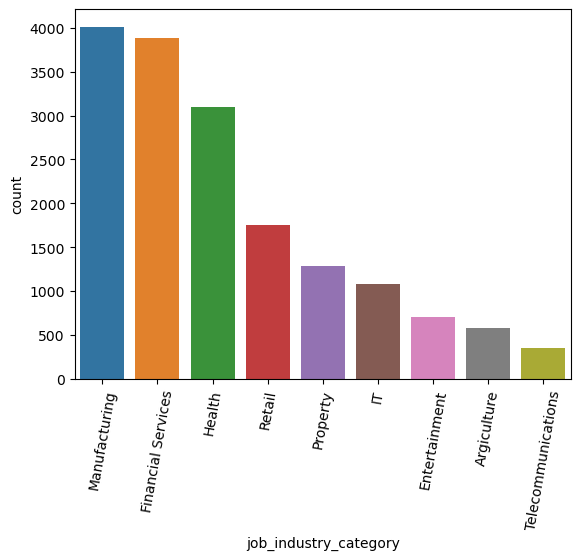

In [52]:
job_counts = Customers['job_industry_category'].value_counts().sort_values(ascending=False)
sns.countplot(data=Customers, x='job_industry_category', order=job_counts.index)
plt.xticks(rotation=80)

#### Most common birth years

In [53]:
Birth_year = Customers["DOB"].dt.year.value_counts().head()
Birth_year

1978.0    1114
1977.0    1062
1976.0     776
1974.0     754
1980.0     636
Name: DOB, dtype: int64

Most customers birth years fall between 1978 - 1980

#### The wealth segment

In [54]:
Wealth_segment = Customers["wealth_segment"].value_counts()
Wealth_segment

Mass Customer        10029
High Net Worth        5081
Affluent Customer     4858
Name: wealth_segment, dtype: int64

Most customers are of the lowest classification of customers - Mass Customers

#### Gender count

In [55]:
Customers["gender"].value_counts()


Female    9997
Male      9516
Name: gender, dtype: int64

In [71]:
# Group by gender and sum the list_price column
revenue_by_gender = Customers.groupby("gender")["list_price"].sum()

# Print the resulting Series
print(revenue_by_gender)

gender
Female    11004937.76
Male      10581846.33
Name: list_price, dtype: float64


#### Creating Age range

In [75]:
import datetime as dt
pd.set_option('display.max_rows', 10)
# Calculate current year
current_year = dt.datetime.now().year

# Create a new column for age
Customers['Age'] = current_year - Customers['DOB'].dt.year

# Create age range categories
age_ranges = pd.cut(Customers['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90], 
                    labels=['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-91'])

# Assign age ranges to the original datafra = age_ranges
Customers['Age_range'] = age_ranges
age_ranges

0        61-70
1        61-70
2        61-70
3        61-70
4        61-70
         ...  
19963    51-60
19964    51-60
19965    51-60
19966    51-60
19967    51-60
Name: Age, Length: 19968, dtype: category
Categories (8, object): ['<18' < '18-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80' < '81-91']

In [76]:
# Calculate revenue per age range
revenue_by_age = Customers.groupby('Age_range')['list_price'].sum()
revenue_by_age


Age_range
<18            0.00
18-30    3332619.14
31-40    3669317.65
41-50    7395795.77
51-60    3876659.58
61-70    3277555.81
71-80      13972.18
81-91       7859.61
Name: list_price, dtype: float64

#### Total Revenue & Total profit 

In [77]:
# Total Revenue
total_revenue = Customers["list_price"].sum()

# Total Standard Cost
total_standard_cost = Customers["standard_cost"].sum()

# Total Profit
total_profit = total_revenue - total_standard_cost

print("Total Profit:", total_profit)

Total Profit: 11124562.790000001


In [78]:
bike_brand_revenue = Customers.groupby('brand')['list_price'].sum()
bike_brand_revenue

brand
Giant Bicycles    4087286.32
Norco Bicycles    2653270.18
OHM Cycles        2990291.79
Solex             4492867.78
Trek Bicycles     3530928.30
WeareA2B          4154701.36
Name: list_price, dtype: float64

In [79]:
# Calculate revenue by state
revenue_by_state = Customers.groupby('state')['list_price'].sum().reset_index()

# Print the resulting dataframe
print(revenue_by_state)

             state   list_price
0  New South Wales  11767595.09
1       Queensland   4769643.58
2         Victoria   5582912.45


#### Let's see the job categories and if they own cars

In [80]:
car_ownership = Customers.groupby(['job_industry_category', 'brand'])['owns_car'].value_counts()
car_ownership

job_industry_category  brand           owns_car
Argiculture            Giant Bicycles  Yes         54
                                       No          42
                       Norco Bicycles  Yes         40
                                       No          39
                       OHM Cycles      Yes         48
                                                   ..
Telecommunications     Solex           No          38
                       Trek Bicycles   Yes         23
                                       No          18
                       WeareA2B        No          31
                                       Yes         29
Name: owns_car, Length: 108, dtype: int64

#### Orders per month

In [90]:
import pandas as pd

# Convert 'transaction_date' column to datetime
Customers['transaction_date'] = pd.to_datetime(Customers['transaction_date'])

# Extract month from 'transaction_date'
Customers['month'] = Customers['transaction_date'].dt.month

# Count number of orders per month
orders_per_month = Customers['month'].value_counts().sort_index()

print(orders_per_month)


1     1679
2     1622
3     1652
4     1652
5     1683
      ... 
8     1746
9     1566
10    1768
11    1663
12    1643
Name: month, Length: 12, dtype: int64


##### Insights & Figures
- The total revenue is $22,120,151.12.

- The total profit is $11,124,562.

- Females generate more revenue ($1,004,937.76), 

- Males generate less revenue ($10,581,846.33).

- Most customers are of the lowest classification of customers - Mass Customers(10,029).

- Most customers birth years fall between 1978 - 1980.

- Customers ages 40 - 50 generate the most revenue ($7,395,795.77). 

> This is followed by Customers ages 50 - 60 with a revenue of $3,876,659.58

- The Solex bike brand generated the most revenue ($4,492,867.78).

- New South Wales produced the highest revenue ($11,767,595.09).

# Data Report and Visualization would be done on a dashboard with Power BI.

In [91]:
# Exporting our clean data to an excel format
Customers.to_excel("Customers.xlsx", index=False)

In [93]:
# Saving as a notebook(.ipynb) 
%notebook "C:/Users/HP/Downloads/KPMG-pythcodes.ipynb" 